# Optics calculation and matching for a large ring (LHC) - part 1

In [1]:
%matplotlib widget

In [2]:
import xtrack as xt

import numpy as np
import matplotlib.pyplot as plt

### Load LHC model

In [3]:
collider = xt.Multiline.from_json("hllhc15_collider_thick.json")
collider.vars.load_madx("opt_round_150_1500.madx")

collider.build_trackers()

Loading line from dict:   0%|          | 0/29009 [00:00<?, ?it/s]

Done loading line from dict.           


### Initial twiss

In [4]:
tw0 = collider.lhcb1.twiss()

In [5]:
# Inspect IPS
tw0.rows['ip.*'].cols['betx bety mux muy x y']

TwissTable: 9 rows, 7 cols
name            betx          bety           mux           muy             x             y
ip1             0.15          0.15             0             0             0             0
ip2               10            10       8.23376        7.6927   -1.8097e-17  -1.75964e-35
ip3          121.567       218.584       15.9494       15.4503   4.41365e-16   4.75465e-35
ip4           236.18       306.197        23.507       22.3832  -1.52091e-17   1.30816e-35
ip5             0.15          0.15       30.9305       29.9889   6.20481e-18  -1.70714e-36
ip6          273.434        183.74       38.7487       37.3936   6.75034e-16   1.55795e-35
ip7          120.813       149.431       46.3524       44.5934  -4.78578e-16    7.5643e-35
ip8              1.5           1.5       54.3432       52.2729  -5.55207e-17  -8.26294e-36
ip1.l1          0.15          0.15         62.31         60.32  -1.70479e-17  -6.89158e-35

### Prepare for optics matching: set limits and steps for all circuits

In [6]:
import lhc_match as lm
lm.set_var_limits_and_steps(collider)

In [7]:
# Inspect for one circuit
collider.vars.vary_default['kq4.l2b2']

{'step': 1e-06, 'limits': (0.00020557714282348692, 0.0068525714274495645)}

### Twiss on a part of the machine (bidirectional)

In [8]:
tw_81_12 = collider.lhcb1.twiss(start='ip8', end='ip2', init_at='ip1',
                                betx=0.15, bety=0.15)

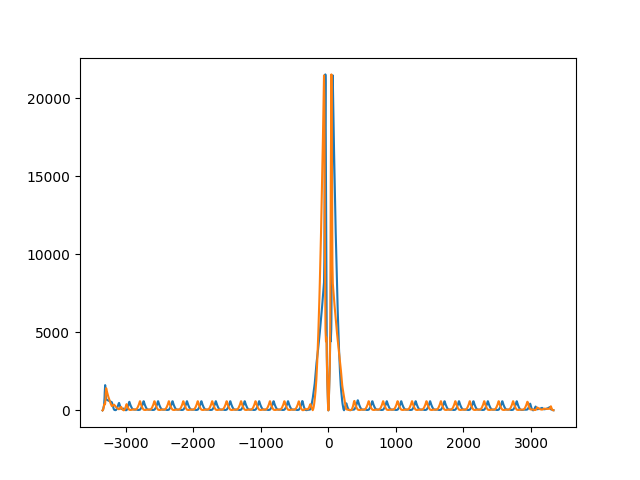

In [9]:
plt.figure()
plt.plot(tw_81_12.s, tw_81_12.betx)
plt.plot(tw_81_12.s, tw_81_12.bety)

### Telescopic rematch of IP1 using IP2 and IP8

#### Match left side

In [10]:
opt = collider.lhcb1.match(
    solve=False,
    default_tol={None: 1e-8, 'betx': 1e-6, 'bety': 1e-6, 'alfx': 1e-6, 'alfy': 1e-6},
    start='s.ds.l8.b1', end='ip1',
    init=tw0, init_at=xt.START,
    vary=[
        # Only IR8 quadrupoles including DS
        xt.VaryList(['kq6.l8b1', 'kq7.l8b1', 'kq8.l8b1', 'kq9.l8b1', 'kq10.l8b1', 
            'kqtl11.l8b1', 'kqt12.l8b1', 'kqt13.l8b1',
            'kq4.l8b1', 'kq5.l8b1', 'kq4.r8b1', 'kq5.r8b1', 
            'kq6.r8b1', 'kq7.r8b1', 'kq8.r8b1', 'kq9.r8b1', 
            'kq10.r8b1', 'kqtl11.r8b1', 'kqt12.r8b1', 'kqt13.r8b1'])],
    targets=[
        xt.TargetSet(at='ip8', tars=('betx', 'bety', 'alfx', 'alfy', 'dx', 'dpx'), value=tw0),
        xt.TargetSet(at='ip1', betx=0.15, bety=0.10, alfx=0, alfy=0, dx=0, dpx=0),
        xt.TargetRelPhaseAdvance('mux', value = tw0['mux', 'ip1.l1'] - tw0['mux', 's.ds.l8.b1']),
        xt.TargetRelPhaseAdvance('muy', value = tw0['muy', 'ip1.l1'] - tw0['muy', 's.ds.l8.b1']), 
    ])

In [11]:
opt.target_status()

Target status:               alty = 5.0000e-02              
id state tag      tol_met       residue   current_val    target_val description                                 
0  ON    ip8_betx    True  -3.97872e-10           1.5           1.5 ('betx', 'ip8'), val=1.5, tol=1e-06, wei ...
1  ON    ip8_bety    True  -5.73914e-11           1.5           1.5 ('bety', 'ip8'), val=1.5, tol=1e-06, wei ...
2  ON    ip8_alfx    True  -1.43987e-10   2.21743e-07   2.21887e-07 ('alfx', 'ip8'), val=2.21887e-07, tol=1e ...
3  ON    ip8_alfy    True   1.85598e-12   2.15516e-07   2.15514e-07 ('alfy', 'ip8'), val=2.15514e-07, tol=1e ...
4  ON    ip8_dx      True   9.97406e-10   1.71316e-09   7.15756e-10 ('dx', 'ip8'), val=7.15756e-10, tol=1e-0 ...
5  ON    ip8_dpx     True   7.09237e-10   8.33401e-10   1.24164e-10 ('dpx', 'ip8'), val=1.24164e-10, tol=1e- ...
6  ON    ip1_betx    True  -5.33938e-08          0.15          0.15 ('betx', 'ip1'), val=0.15, tol=1e-06, we ...
7  ON    ip1_bety   False          

In [12]:
opt.step(40)

                                             
Optimize - start penalty: 0.05                              
Matching: model call n. 445 penalty = 1.8373e-07              
Optimize - end penalty:  1.83728e-07                            


In [13]:
opt.target_status()

Target status:               enalty = 1.8373e-07              
id state tag      tol_met       residue   current_val    target_val description                                 
0  ON    ip8_betx    True  -5.60544e-10           1.5           1.5 ('betx', 'ip8'), val=1.5, tol=1e-06, wei ...
1  ON    ip8_bety    True   1.96854e-09           1.5           1.5 ('bety', 'ip8'), val=1.5, tol=1e-06, wei ...
2  ON    ip8_alfx    True   1.60677e-10   2.22048e-07   2.21887e-07 ('alfx', 'ip8'), val=2.21887e-07, tol=1e ...
3  ON    ip8_alfy    True    1.3808e-11   2.15528e-07   2.15514e-07 ('alfy', 'ip8'), val=2.15514e-07, tol=1e ...
4  ON    ip8_dx      True  -1.03333e-10   6.12423e-10   7.15756e-10 ('dx', 'ip8'), val=7.15756e-10, tol=1e-0 ...
5  ON    ip8_dpx     True  -1.46131e-10  -2.19672e-11   1.24164e-10 ('dpx', 'ip8'), val=1.24164e-10, tol=1e- ...
6  ON    ip1_betx    True   2.80427e-10          0.15          0.15 ('betx', 'ip1'), val=0.15, tol=1e-06, we ...
7  ON    ip1_bety    True  -6.162

#### Match right side

In [14]:
opt = collider.lhcb1.match(
    solve=False,
    default_tol={None: 1e-8, 'betx': 1e-6, 'bety': 1e-6, 'alfx': 1e-6, 'alfy': 1e-6},
    start='ip1', end='e.ds.r2.b1',
    init=tw0, init_at=xt.END, # <-- We match going backward in the line
    vary=[
        xt.VaryList([
            'kq9.l2b1', 'kq10.l2b1', 'kqtl11.l2b1', 'kqt12.l2b1', 'kqt13.l2b1',
            'kq9.r2b1', 'kq10.r2b1', 'kqtl11.r2b1', 'kqt12.r2b1', 'kqt13.r2b1',
            'kq4.l2b1', 'kq5.l2b1',  'kq6.l2b1', 'kq7.l2b1', 'kq8.l2b1',
            'kq6.r2b1',  'kq7.r2b1', 'kq8.r2b1', 'kq4.r2b1', 'kq5.r2b1'])],
    targets=[
        # Only IR2 quadrupoles including DS
        xt.TargetSet(at='ip1', betx=0.15, bety=0.10, alfx=0, alfy=0, dx=0, dpx=0),
        xt.TargetSet(at='ip2', tars=('betx', 'bety', 'alfx', 'alfy', 'dx', 'dpx'), value=tw0),
        xt.TargetRelPhaseAdvance('mux', value = tw0['mux', 'e.ds.r2.b1'] - tw0['mux', 'ip1']),
        xt.TargetRelPhaseAdvance('muy', value = tw0['muy', 'e.ds.r2.b1'] - tw0['muy', 'ip1']),
    ])

In [15]:
opt.step(20)

                                             
Optimize - start penalty: 0.05                              
Matching: model call n. 112 penalty = 2.3723e-08              
Optimize - end penalty:  2.37226e-08                            


In [16]:
opt.target_status()

Target status:               enalty = 2.3723e-08              
id state tag      tol_met       residue   current_val    target_val description                                 
0  ON    ip1_betx    True   8.25279e-11          0.15          0.15 ('betx', 'ip1'), val=0.15, tol=1e-06, we ...
1  ON    ip1_bety    True  -1.02261e-10           0.1           0.1 ('bety', 'ip1'), val=0.1, tol=1e-06, wei ...
2  ON    ip1_alfx    True  -8.97165e-10  -8.97165e-10             0 ('alfx', 'ip1'), val=0, tol=1e-06, weigh ...
3  ON    ip1_alfy    True   6.43083e-11   6.43083e-11             0 ('alfy', 'ip1'), val=0, tol=1e-06, weigh ...
4  ON    ip1_dx      True  -1.14725e-11  -1.14725e-11             0 ('dx', 'ip1'), val=0, tol=1e-08, weight= ...
5  ON    ip1_dpx     True  -2.18901e-10  -2.18901e-10             0 ('dpx', 'ip1'), val=0, tol=1e-08, weight ...
6  ON    ip2_betx    True  -2.89081e-10            10            10 ('betx', 'ip2'), val=10, tol=1e-06, weig ...
7  ON    ip2_bety    True   1.697

#### Inspect results

In [17]:
tw_new = collider.lhcb1.twiss()

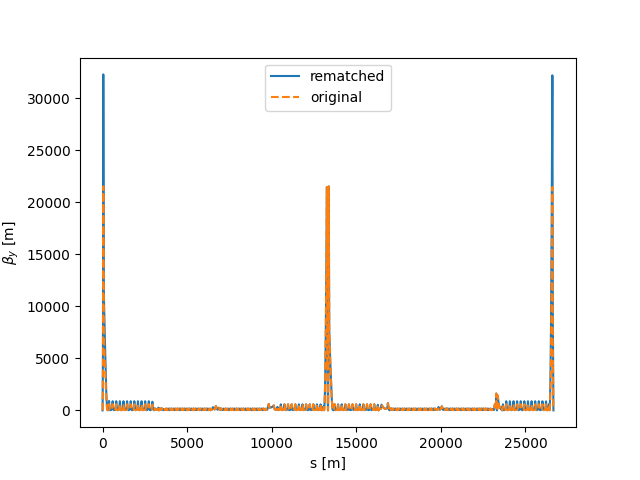

In [18]:
plt.figure()
plt.plot(tw_new.s, tw_new.bety, label='rematched')
plt.plot(tw0.s, tw0.bety, '--', label='original')
plt.xlabel('s [m]')
plt.ylabel(r'$\beta_y$ [m]')
plt.legend()

In [ ]:
# Inspect table
tw_new.rows['ip.*'].cols['betx bety mux muy x y']